<a href="https://colab.research.google.com/github/rameshthangam/AI-ML/blob/master/BOT_flagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import make_scorer,f1_score,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score,roc_curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import warnings
!pip install git+https://github.com/evidentlyai/evidently.git
import evidently
from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset, ClassificationPreset
warnings.filterwarnings('ignore')

  Cloning https://github.com/evidentlyai/evidently.git to /tmp/pip-req-build-3vyjq33b
  Running command git clone --filter=blob:none --quiet https://github.com/evidentlyai/evidently.git /tmp/pip-req-build-3vyjq33b
  Resolved https://github.com/evidentlyai/evidently.git to commit 4329352b3c4bd8e63b77f6726862a893b95911c7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.1/231.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 27.4 MB/s eta 0:00:00


In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# Configure Kaggle API in Colab
# import os
# os.makedirs('/root/.kaggle', exist_ok=True)
# os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

In [ ]:
#Install kaggle Library
# !pip install kaggle

In [ ]:
# Download the data
!kaggle datasets download -d dasgroup/rba-dataset

Dataset URL: https://www.kaggle.com/datasets/dasgroup/rba-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 1.09G/1.10G [00:11<00:00, 89.9MB/s]
100% 1.10G/1.10G [00:11<00:00, 107MB/s] 


In [ ]:
#Unzip the dataset if needed
import zipfile

with zipfile.ZipFile('rba-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset-directory')


KeyboardInterrupt: 

In [ ]:
df_training = pd.read_csv('dataset-directory/rba-dataset.csv', nrows = 50000)
df_training.head(10)
# df_training.shape
df_training['Country'].unique()




array(['NO', 'AU', 'US', 'ID', 'BR', 'PL', 'IN', 'DK', 'DE', 'BD', 'MD',
       'NL', 'RO', 'GB', 'AR', 'FI', 'CZ', 'CA', 'FR', 'TR', 'RU', 'CL',
       'BZ', 'IR', 'UA', 'EG', 'CH', 'IS', 'BG', 'TH', 'IT', 'CO', 'PH',
       'MX', 'CN', 'VN', 'MY', 'PK', 'ES', 'IL', 'SI', 'NG', 'CY', 'LU',
       'HU', 'VG', 'KR', 'GY', 'LV', 'NZ', 'MW', 'LB', 'PA', 'DO', 'CM',
       'BA', 'AT', 'SV', 'KZ', 'BE', 'ZA', 'MM', 'JP', 'SG', 'PR', 'IE',
       'HR', 'IQ', 'BW', 'JO', 'KH', 'RS', 'TW', 'SK', 'NP', 'CV', 'LI',
       'KE', 'AM', 'ML', 'EE', 'GT', 'PY', 'NI', 'CI', 'LT', 'VE', 'EC',
       'KY', 'AO', 'BF', 'CR', 'BO', 'MN', 'KG', 'SE', 'GP', 'AF', 'SA',
       'ME', 'SZ', 'GR', 'KW', 'PS', 'GE', 'CD', 'GH', 'LY', 'CW', 'LK',
       'NC', 'TT', 'SN', 'PT', 'TN', 'BJ', 'MZ', 'MV', 'GW', 'BN', 'SS',
       'BY', 'TZ', 'HK', 'AL', 'GA'], dtype=object)

In [ ]:
df_validation = pd.read_csv('dataset-directory/rba-dataset.csv',skiprows = 60000, nrows = 10000)
df_validation.head()
df_test = pd.read_csv('dataset-directory/rba-dataset.csv',skiprows = 80000, nrows = 10000)

header = df_training.columns
df_validation.columns = header
df_test.columns = header
df_test.head()


df_test['Country'].unique()


array(['NO', 'US', 'PL', 'BR', 'MU', 'FI', 'IN', 'GB', 'UA', 'NL', 'DE',
       'CZ', 'GH', 'AU', 'IR', 'CA', 'BD', 'FR', 'TR', 'ID', 'AR', 'VN',
       'KE', 'NG', 'KR', 'RO', 'MX', 'ES', 'CR', 'CN', 'DK', 'EG', 'CH',
       'BE', 'TH', 'CL', 'PK', 'PH', 'BG', 'AL', 'IT', 'MN', 'NZ', 'MY',
       'SI', 'IQ', 'MM', 'HK', 'TW', 'SK', 'SE', 'JP', 'HU', 'KZ', 'MV',
       'LT', 'SA', 'CO', 'CM', 'GR', 'ZM', 'MC', 'KW', 'RU', 'PT', 'AT',
       'UZ', 'IL', 'SV', 'AM', 'LV', 'IE', 'GE', 'PA', 'AZ', 'RE', 'BA',
       'VG', 'PE'], dtype=object)

In [ ]:
randomKey = df_training.sample(n=1000)
# print(randomKey['IP Address'])
df_training['Is_BOT'] = (df_training['IP Address'].isin(randomKey['IP Address'])).astype(int)

In [ ]:
# df_training.head(100)
print(df_training['Is_BOT'].unique())
# df_training.head(100)
df_training[df_training['Is_BOT'] == 1].head(500)

[0 1]


,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Is_BOT
5,5,2020-02-03 12:44:05.160,-4324475583306591935,NaN,209.236.123.126,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,True,False,1
17,17,2020-02-03 12:44:33.042,-4324475583306591935,NaN,115.69.219.34,ID,East Java,Surabaya,38778,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile WebView 85.0.4183,iOS 13.4,mobile,False,False,False,1
23,23,2020-02-03 12:44:40.351,-4324475583306591935,NaN,92.220.92.118,BR,-,-,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,False,False,False,1
36,36,2020-02-03 12:44:50.690,-5377627992963732557,NaN,115.69.219.34,ID,East Java,Surabaya,38778,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile WebView 85.0.4183,iOS 13.4,mobile,True,False,False,1
46,46,2020-02-03 12:45:05.332,-4324475583306591935,NaN,10.0.105.195,IN,-,-,45916,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4780,4780,2020-02-03 13:41:48.158,-4324475583306591935,NaN,170.39.78.43,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 50.0.2661,Android 4.1,mobile,False,False,False,1
4798,4798,2020-02-03 13:42:01.243,-4324475583306591935,NaN,103.120.117.135,PK,Sindh,Hyderabad,138039,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Firefox Mobile 68.0,Android 4.1,mobile,False,True,False,1
4813,4813,2020-02-03 13:42:08.126,2975639390819707484,NaN,170.39.79.54,US,-,-,393398,Mozilla/5.0 (Android 6.0.99; Tablet; https://...,Firefox 20.0.0.1754,Android 6.0.99,mobile,True,False,False,1
4824,4824,2020-02-03 13:42:13.393,3488141078640977864,NaN,170.39.77.22,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 81.0.4044,Android 4.1,mobile,True,False,False,1


In [ ]:
# define a function to print accuracy metrics
def encoder(database, catFeatures, qtyFeatures):
  database = database[catFeatures + qtyFeatures]

  dataset_Encoded = pd.get_dummies(database, columns = catFeatures, drop_first = True)

  return dataset_Encoded

def print_accuracy_metrics(Input,Output):
  print("Recall:", recall_score(Input, Output))
  print("Log Loss:", log_loss(Input, Output))
  print("Precision:", precision_score(Input, Output))
  print("Accuracy:", accuracy_score(Input, Output))
  print("AUC: ", roc_auc_score(Input, Output))
  print("F1 Score:", f1_score(Input, Output))
  confusion_matrix_value = confusion_matrix(Input,Output)
  print('Confusion matrix:\n', confusion_matrix_value)
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame( confusion_matrix_value), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

def model_training(model, X, y):
  model.fit(X,y)

  return(model)

def feature_importance(model, X):
  importances = model.feature_importances_
  std = np.std([tree.feature_importances_ for tree in model.estimators_],
               axis=0)
  indices = np.argsort(importances)[::-1]

  # Print the feature ranking
  print("Feature ranking:")

  for f in range(X.shape[1]):
      print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

  # Plot the feature importances of the forest
  plt.figure()
  plt.title("Feature importances")
  plt.bar(range(X.shape[1]), importances[indices],
          color="r", yerr=std[indices], align="center")
  plt.xticks(range(X.shape[1]), indices)
  plt.xlim([-1, X.shape[1]])
  plt.show()

# function to draw ROC curve
def plot_auc_curve(model, X, y):
  try:
      y_pred_prob = model.predict_proba(X)[:,1]
  except:
    d = model.decision_function(X)
    y_pred_prob = np.exp(d) / (1 + np.exp(d))

  auc = roc_auc_score(y, y_pred_prob)
  fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.title('ROC Curve\n AUC={auc}'.format(auc = auc))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid(True)

def Find_Optimal_Cutoff(model, X, y ):
  try:
    y_pred_prob = model.predict_proba(X)[:,1]
  except:
    d = model.decision_function(X)
    y_pred_prob = np.exp(d) / (1 + np.exp(d))

  fpr, tpr, threshold = roc_curve(y, y_pred_prob)
  i = np.arange(len(tpr))
  roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
  roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

  print("Optimal Cutoff:", roc_t['threshold'].values)
  return(roc_t['threshold'].values)


In [ ]:
df_training.shape

(50000, 17)

In [ ]:
df_training.columns

Index(['index', 'Login Timestamp', 'User ID', 'Round-Trip Time [ms]',
       'IP Address', 'Country', 'Region', 'City', 'ASN', 'User Agent String',
       'Browser Name and Version', 'OS Name and Version', 'Device Type',
       'Login Successful', 'Is Attack IP', 'Is Account Takeover', 'Is_BOT'],
      dtype='object')

In [ ]:
df_training.isnull().sum()

,0
index,0
Login Timestamp,0
User ID,0
Round-Trip Time [ms],47640
IP Address,0
Country,0
Region,49
City,15
ASN,0
User Agent String,0


In [ ]:
# Take the mean value of this column and replace the same with null
for f in ['Round-Trip Time [ms]']:
  df_training.loc[df_training[f].isnull(), f] = df_training[f].mean()

In [ ]:
# Required cleanup
df_training['Region'].fillna(value='Unknown', inplace=True)
df_training['City'].fillna(value='Unknown', inplace=True)
df_training['Device Type'].fillna(value='Unknown', inplace=True)

# df_training = df_training.drop('Browser Name and Version', axis =1)
# df_training = df_training.drop('OS Name and Version', axis=1)


In [ ]:
#Convert the unix timestamp to dataetime integer
df_training['Login Timestamp'] = pd.to_datetime(df_training['Login Timestamp'])
df_training['Login Timestamp'] = df_training['Login Timestamp'].astype('int64') / 1e9


In [ ]:
df_training['User Agent Partial'] = df_training['User Agent String'].str.split().str[0] + '_' + df_training['User Agent String'].str.split().str[1].str[1:]
df_training['OS Name'] = df_training['OS Name and Version'].str.split().str[0]
print(df_training['OS Name'].unique())

df_training['User Agent Partial'].fillna(value='Unknown', inplace=True)
df_training['OS Name'].fillna(value='Unknown', inplace=True)
# df_training['OS Version'] = df_training['OS Name and Version'].str.split().str[1]
# df_training['OS Version'].fillna(value='Unknown', inplace=True)

['iOS' 'Android' 'Chrome' 'Mac' 'Chromecast' 'Windows' 'KaiOS' 'Other'
 'BlackBerry' 'Symbian^3' 'MeeGo' 'Fedora' 'Slackware' '134' 'Tizen']


In [ ]:
qtyFeatures = ['Round-Trip Time [ms]', 'IP Address', 'Login Successful', 'Is Attack IP', 'User ID']

catFeatures = ['Country', 'OS Name', 'Device Type', 'City', 'User Agent Partial']

target = 'Is_BOT'
prediction = 'prediction'

In [ ]:
df_training.isnull().sum()

,0
index,0
Login Timestamp,0
User ID,0
Round-Trip Time [ms],0
IP Address,0
Country,0
Region,0
City,0
ASN,0
User Agent String,0


In [ ]:
# Preparing X and y using pandas:
X_encoded = encoder(df_training, catFeatures, qtyFeatures)
# print(X_encoded.head())
# print(X_encoded[['IP Address']])


le = LabelEncoder()
y_encoded = le.fit_transform(df_training[target])
# print(X_encoded.head())


In [ ]:
# df_training.loc[df_training['IP Address'] == '109.247.25.17']
#

In [ ]:
print(y_encoded[3486])

0


In [ ]:
## Generate a fresh data for testing
# Take the mean value of this column and replace the same with null
for f in ['Round-Trip Time [ms]']:
  df_test.loc[df_test[f].isnull(), f] = df_test[f].mean()



# # Required cleanup
df_test['Region'].fillna(value='Unknown', inplace=True)
df_test['City'].fillna(value='Unknown', inplace=True)
df_test['Device Type'].fillna(value='Unknown', inplace=True)

# print(df_test['OS Name'].unique())


# #Convert the unix timestamp to dataetime integer
df_test['Login Timestamp'] = pd.to_datetime(df_test['Login Timestamp'])
df_test['Login Timestamp'] = df_test['Login Timestamp'].astype('int64') / 1e9


df_test['User Agent Partial'] = df_test['User Agent String'].str.split().str[0] + '_' + df_test['User Agent String'].str.split().str[1].str[1:]
# X_train['OS Name'] = X_train['OS Name'].str.replace('-', '_')
# X_test['OS Name'] = X_test['OS Name'].str.replace('-', '_')
df_test['OS Name'] = df_test['OS Name and Version'].str.split().str[0]
df_test['OS Version'] = df_test['OS Name and Version'].str.split().str[1]
df_test['OS Version'].fillna(value='Unknown', inplace=True)
df_test['Is_BOT'] = 0


# # Preparing X and y using pandas:
X1_encoded = encoder(df_test, catFeatures, qtyFeatures)




# # # Assuming 'date_column' is the name of the column with datetime strings
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1_encoded, y1_encoded, test_size=0.5, random_state=42)

# le = LabelEncoder()
# X1_test['IP Address'] = le.fit_transform(X1_test['IP Address'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
print(y_train[:50])
print(y_test[:50])
# X_train.head(10)
# X_test.columns

#print isbot column from xtrain with index 17
X_train.head()
# print(y_train[5])



(40000, 2304)
(10000, 2304)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0]


,Round-Trip Time [ms],IP Address,Login Successful,Is Attack IP,User ID,Country_AL,Country_AM,Country_AO,Country_AR,Country_AT,...,User Agent Partial_Opera/9.80_iPhone;,User Agent Partial_RankingBot2_-,User Agent Partial_Unknown,User Agent Partial_Windows/95_ther/1.0.0.3168.3174,User Agent Partial_Windows/95_ther/1.0.0.3168.3191,User Agent Partial_ZipppBot/0.11_ZipppBot;,User Agent Partial_ZoomBot_Linkbot,User Agent Partial_direct;Mozilla/5.0_Linux;,User Agent Partial_iOS/2.8.0_ther/1.0.0.3824,User Agent Partial_nslookup_q=cname
39087,685.355932,188.227.86.27,True,False,3722583297410905894,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30893,685.355932,10.2.53.237,False,False,-4324475583306591935,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45278,685.355932,109.247.203.41,True,False,6197893874940275906,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16398,685.355932,170.39.77.59,False,False,-4324475583306591935,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13653,685.355932,204.145.41.64,False,False,-4324475583306591935,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# # Assuming 'date_column' is the name of the column with datetime strings
le = LabelEncoder()
# X_train['Login Timestamp'] = le.fit_transform(X_train['Login Timestamp'])
# X_test['Login Timestamp'] = le.fit_transform(X_test['Login Timestamp'])

X_train['IP Address'] = le.fit_transform(X_train['IP Address'])
X_test['IP Address'] = le.fit_transform(X_test['IP Address'])

# X_train['City'] = le.fit_transform(X_train['City'])
# X_test['City'] = le.fit_transform(X_test['City'])

# X_train['User Agent Partial'] = le.fit_transform(X_train['User Agent Partial'])
# X_test['User Agent Partial'] = le.fit_transform(X_test['User Agent Partial'])


# X_train['City'] = le.fit_transform(X_train['City'])
# X_test['City'] = le.fit_transform(X_test['City'])

# # Fit and Transform the Country as well
# X_train['Country'] = le.fit_transform(X_train['Country'])
# X_test['Country'] = le.fit_transform(X_test['Country'])

# Replace hyphens with NaNs, then fill NaNs with a suitable value (e.g., 0)
# X_train.replace('-', np.nan, inplace=True)
# X_train.fillna(0, inplace=True)

# X_test.replace('-', np.nan, inplace=True)
# X_test.fillna(0, inplace=True)

# # Convert all columns in X_train to numeric type
# X_train = X_train.apply(pd.to_numeric, errors='coerce')
# X_test = X_test.apply(pd.to_numeric, errors='coerce')


# # Fill any remaining NaNs after numeric conversion
# X_train.fillna(0, inplace=True)
# X_test.fillna(0, inplace=True)



In [ ]:
# log_reg = LogisticRegression()
# trained_model = model_training(log_reg, X_train, y_train)

# Implement Random forest classifier for the trained data
rf_classifier = RandomForestClassifier()
trained_model = model_training(rf_classifier, X_train, y_train)

Optimal Cutoff: [0.06]


array([0.06])

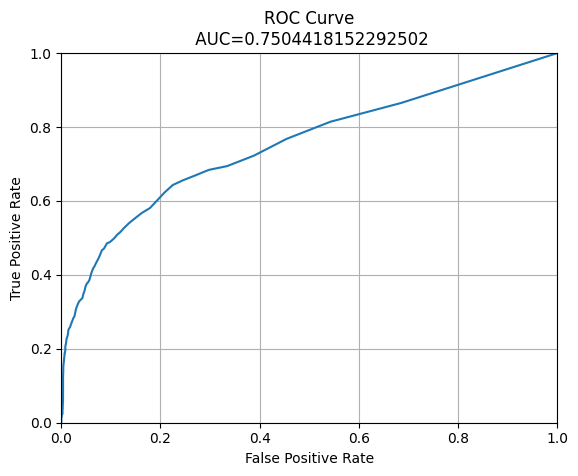

In [ ]:
plot_auc_curve(trained_model, X_test, y_test)
Find_Optimal_Cutoff(trained_model, X_test, y_test)

Recall: 0.25028312570781425
Log Loss: 2.851052983079167
Precision: 0.6314285714285715
Accuracy: 0.9209
AUC:  0.6180668672303467
F1 Score: 0.3584752635847526
Confusion matrix:
 [[8988  129]
 [ 662  221]]


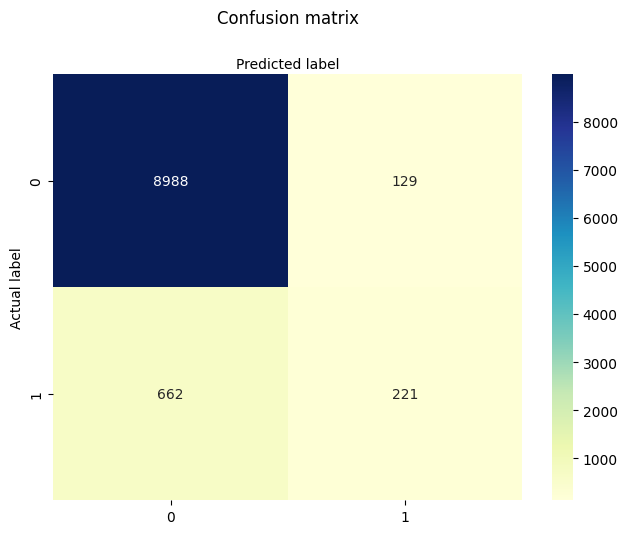

In [ ]:
# Accuracy metrics for
y_pred = trained_model.predict(X_test)

print_accuracy_metrics(y_test,y_pred)

In [ ]:
df_test['prediction'] = y_pred

In [ ]:
# Accuracy metrics for
# y_pred = trained_model.predict(X1_encoded)

# print_accuracy_metrics(y_test,y_pred)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- City_Alto Alegre dos Parecis
- City_Alto do Rodrigues
- City_Ambakapalle
- City_Amravati
- City_Ananas
- ...
Feature names seen at fit time, yet now missing:
- City_Aadorp
- City_Abelardo Luz
- City_Aboyne
- City_Abuja
- City_Adamantina
- ...


Model Performance


In [ ]:
column_mapping = ColumnMapping()

column_mapping.target = 'Is_BOT'
column_mapping.prediction = 'prediction'
column_mapping.numerical_features = qtyFeatures
column_mapping.categorical_features = catFeatures

In [ ]:
regression_perfomance = Report(metrics=[ClassificationPreset()])
regression_perfomance.run(current_data=df_test, reference_data=None, column_mapping=column_mapping)

In [ ]:
regression_perfomance.show()

ValueError: The columns 'target' and 'prediction' columns should be present